In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
dataset = pd.read_csv('Dataset_spine.csv')
dataset

Col1       Col2       Col3       Col4        Col5       Col6  \
0    63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400   
1    39.056951  10.060991  25.015378  28.995960  114.405425   4.564259   
2    68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317   
3    69.297008  24.652878  44.311238  44.644130  101.868495  11.211523   
4    49.712859   9.652075  28.317406  40.060784  108.168725   7.918501   
..         ...        ...        ...        ...         ...        ...   
305  47.903565  13.616688  36.000000  34.286877  117.449062  -4.245395   
306  53.936748  20.721496  29.220534  33.215251  114.365845  -0.421010   
307  61.446597  22.694968  46.170347  38.751628  125.670725  -2.707880   
308  45.252792   8.693157  41.583126  36.559635  118.545842   0.214750   
309  33.841641   5.073991  36.641233  28.767649  123.945244  -0.199249   

         Col7     Col8     Col9     Col10      Col11    Col12 Class_att  \
0    0.744503  12.5661  14.5386  15.30468 -28.658501  43.5123  Abnormal   
1    0.415186  12.8874  17.5323  16.78486 -25.530607  16.1102  Abnormal   
2    0.474889  26.8343  17.4861  16.65897 -29.031888  19.2221  Abnormal   
3    0.369345  23.5603  12.7074  11.42447 -30.470246  18.8329  Abnormal   
4    0.543360  35.4940  15.9546   8.87237 -16.378376  24.9171  Abnormal   
..        ...      ...      ...       ...        ...      ...       ...   
305  0.129744   7.8433  14.7484   8.51707 -15.728927  11.5472    Normal   
306  0.047913  19.1986  18.1972   7.08745   6.013843  43.8693    Normal   
307  0.081070  16.2059  13.5565   8.89572   3.564463  18.4151    Normal   
308  0.159251  14.7334  16.0928   9.75922   5.767308  33.7192    Normal   
309  0.674504  19.3825  17.6963  13.72929   1.783007  40.6049    Normal   

                                           Unnamed: 13  
0                                                  NaN  
1                                                  NaN  
2    Prediction is done by using binary classificat...  
3                                                  NaN  
4                                                  NaN  
..                                                 ...  
305                                                NaN  
306                                                NaN  
307                                                NaN  
308                                                NaN  
309                                                NaN  

[310 rows x 14 columns]

In [5]:
dataset.iloc[:,-1:]

Unnamed: 13
0                                                  NaN
1                                                  NaN
2    Prediction is done by using binary classificat...
3                                                  NaN
4                                                  NaN
..                                                 ...
305                                                NaN
306                                                NaN
307                                                NaN
308                                                NaN
309                                                NaN

[310 rows x 1 columns]

In [6]:
del dataset['Unnamed: 13']

In [7]:
dataset.describe()

Col1        Col2        Col3        Col4        Col5        Col6  \
count  310.000000  310.000000  310.000000  310.000000  310.000000  310.000000   
mean    60.496653   17.542822   51.930930   42.953831  117.920655   26.296694   
std     17.236520   10.008330   18.554064   13.423102   13.317377   37.559027   
min     26.147921   -6.554948   14.000000   13.366931   70.082575  -11.058179   
25%     46.430294   10.667069   37.000000   33.347122  110.709196    1.603727   
50%     58.691038   16.357689   49.562398   42.404912  118.268178   11.767934   
75%     72.877696   22.120395   63.000000   52.695888  125.467674   41.287352   
max    129.834041   49.431864  125.742385  121.429566  163.071041  418.543082   

             Col7        Col8        Col9       Col10       Col11       Col12  
count  310.000000  310.000000  310.000000  310.000000  310.000000  310.000000  
mean     0.472979   21.321526   13.064511   11.933317  -14.053139   25.645981  
std      0.285787    8.639423    3.399713    2.893265   12.225582   10.450558  
min      0.003220    7.027000    7.037800    7.030600  -35.287375    7.007900  
25%      0.224367   13.054400   10.417800    9.541140  -24.289522   17.189075  
50%      0.475989   21.907150   12.938450   11.953835  -14.622856   24.931950  
75%      0.704846   28.954075   15.889525   14.371810   -3.497094   33.979600  
max      0.998827   36.743900   19.324000   16.821080    6.972071   44.341200

In [8]:
dataset.rename(columns={"Col1":"pelvic_incidence","Col2":"pelvic_tilt","Col3":"lumbar_lordosis_angle","Col4":"sacral_slope","Col5":"pelvic_radius","Col6":"degree_spondylolisthesis","Col7":"pelvic_slope","Col8":"Direct_tilt","Col9":"thoracic_slope","Col10":"cervical_tilt","Col11":"sacrum_angle","Col12":"scoliosis_slope","Class_att":"Class"},inplace=True)

In [9]:
dataset.shape

(310, 13)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Class                     310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [11]:
dataset["Class"].value_counts().sort_index()

Class
Abnormal    210
Normal      100
Name: count, dtype: int64

In [12]:
dataset.drop(columns=['Class']).corr()

pelvic_incidence  pelvic_tilt  \
pelvic_incidence                  1.000000     0.629199   
pelvic_tilt                       0.629199     1.000000   
lumbar_lordosis_angle             0.717282     0.432764   
sacral_slope                      0.814960     0.062345   
pelvic_radius                    -0.247467     0.032668   
degree_spondylolisthesis          0.638743     0.397862   
pelvic_slope                      0.043290     0.008852   
Direct_tilt                      -0.078411    -0.072119   
thoracic_slope                   -0.089740    -0.063394   
cervical_tilt                     0.016750     0.028931   
sacrum_angle                      0.019240     0.032859   
scoliosis_slope                  -0.007251    -0.056550   

                          lumbar_lordosis_angle  sacral_slope  pelvic_radius  \
pelvic_incidence                       0.717282      0.814960      -0.247467   
pelvic_tilt                            0.432764      0.062345       0.032668   
lumbar_lordosis_angle                  1.000000      0.598387      -0.080344   
sacral_slope                           0.598387      1.000000      -0.342128   
pelvic_radius                         -0.080344     -0.342128       1.000000   
degree_spondylolisthesis               0.533667      0.523557      -0.026065   
pelvic_slope                           0.029486      0.048988       0.015767   
Direct_tilt                           -0.112939     -0.046914       0.063433   
thoracic_slope                        -0.063582     -0.067968       0.060477   
cervical_tilt                          0.063875     -0.000063      -0.039800   
sacrum_angle                           0.057199      0.000207       0.029738   
scoliosis_slope                       -0.049054      0.032853      -0.030145   

                          degree_spondylolisthesis  pelvic_slope  Direct_tilt  \
pelvic_incidence                          0.638743      0.043290    -0.078411   
pelvic_tilt                               0.397862      0.008852    -0.072119   
lumbar_lordosis_angle                     0.533667      0.029486    -0.112939   
sacral_slope                              0.523557      0.048988    -0.046914   
pelvic_radius                            -0.026065      0.015767     0.063433   
degree_spondylolisthesis                  1.000000      0.085925    -0.063812   
pelvic_slope                              0.085925      1.000000     0.012694   
Direct_tilt                              -0.063812      0.012694     1.000000   
thoracic_slope                           -0.057286     -0.011770     0.009887   
cervical_tilt                             0.056576      0.088017     0.072738   
sacrum_angle                              0.023021      0.060743    -0.037428   
scoliosis_slope                          -0.041023     -0.073893    -0.024021   

                          thoracic_slope  cervical_tilt  sacrum_angle  \
pelvic_incidence               -0.089740       0.016750      0.019240   
pelvic_tilt                    -0.063394       0.028931      0.032859   
lumbar_lordosis_angle          -0.063582       0.063875      0.057199   
sacral_slope                   -0.067968      -0.000063      0.000207   
pelvic_radius                   0.060477      -0.039800      0.029738   
degree_spondylolisthesis       -0.057286       0.056576      0.023021   
pelvic_slope                   -0.011770       0.088017      0.060743   
Direct_tilt                     0.009887       0.072738     -0.037428   
thoracic_slope                  1.000000       0.052451      0.011354   
cervical_tilt                   0.052451       1.000000      0.057451   
sacrum_angle                    0.011354       0.057451      1.000000   
scoliosis_slope                 0.009541       0.021243      0.015337   

                          scoliosis_slope  
pelvic_incidence                -0.007251  
pelvic_tilt                     -0.056550  
lumbar_lordosis_angle           -0.049054  
sacral_slope                     0.03

<Axes: >

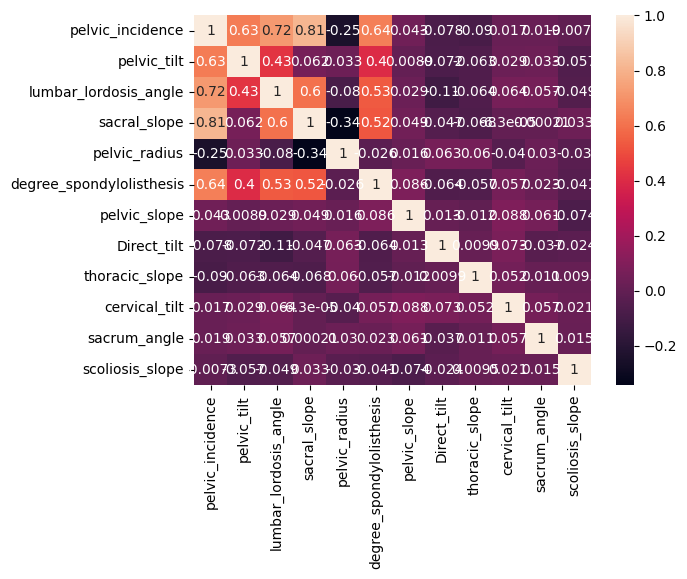

In [13]:
# plt.Subplot(figsize=(12,8))
sns.heatmap(dataset.drop(columns=['Class']).corr(),annot=True)


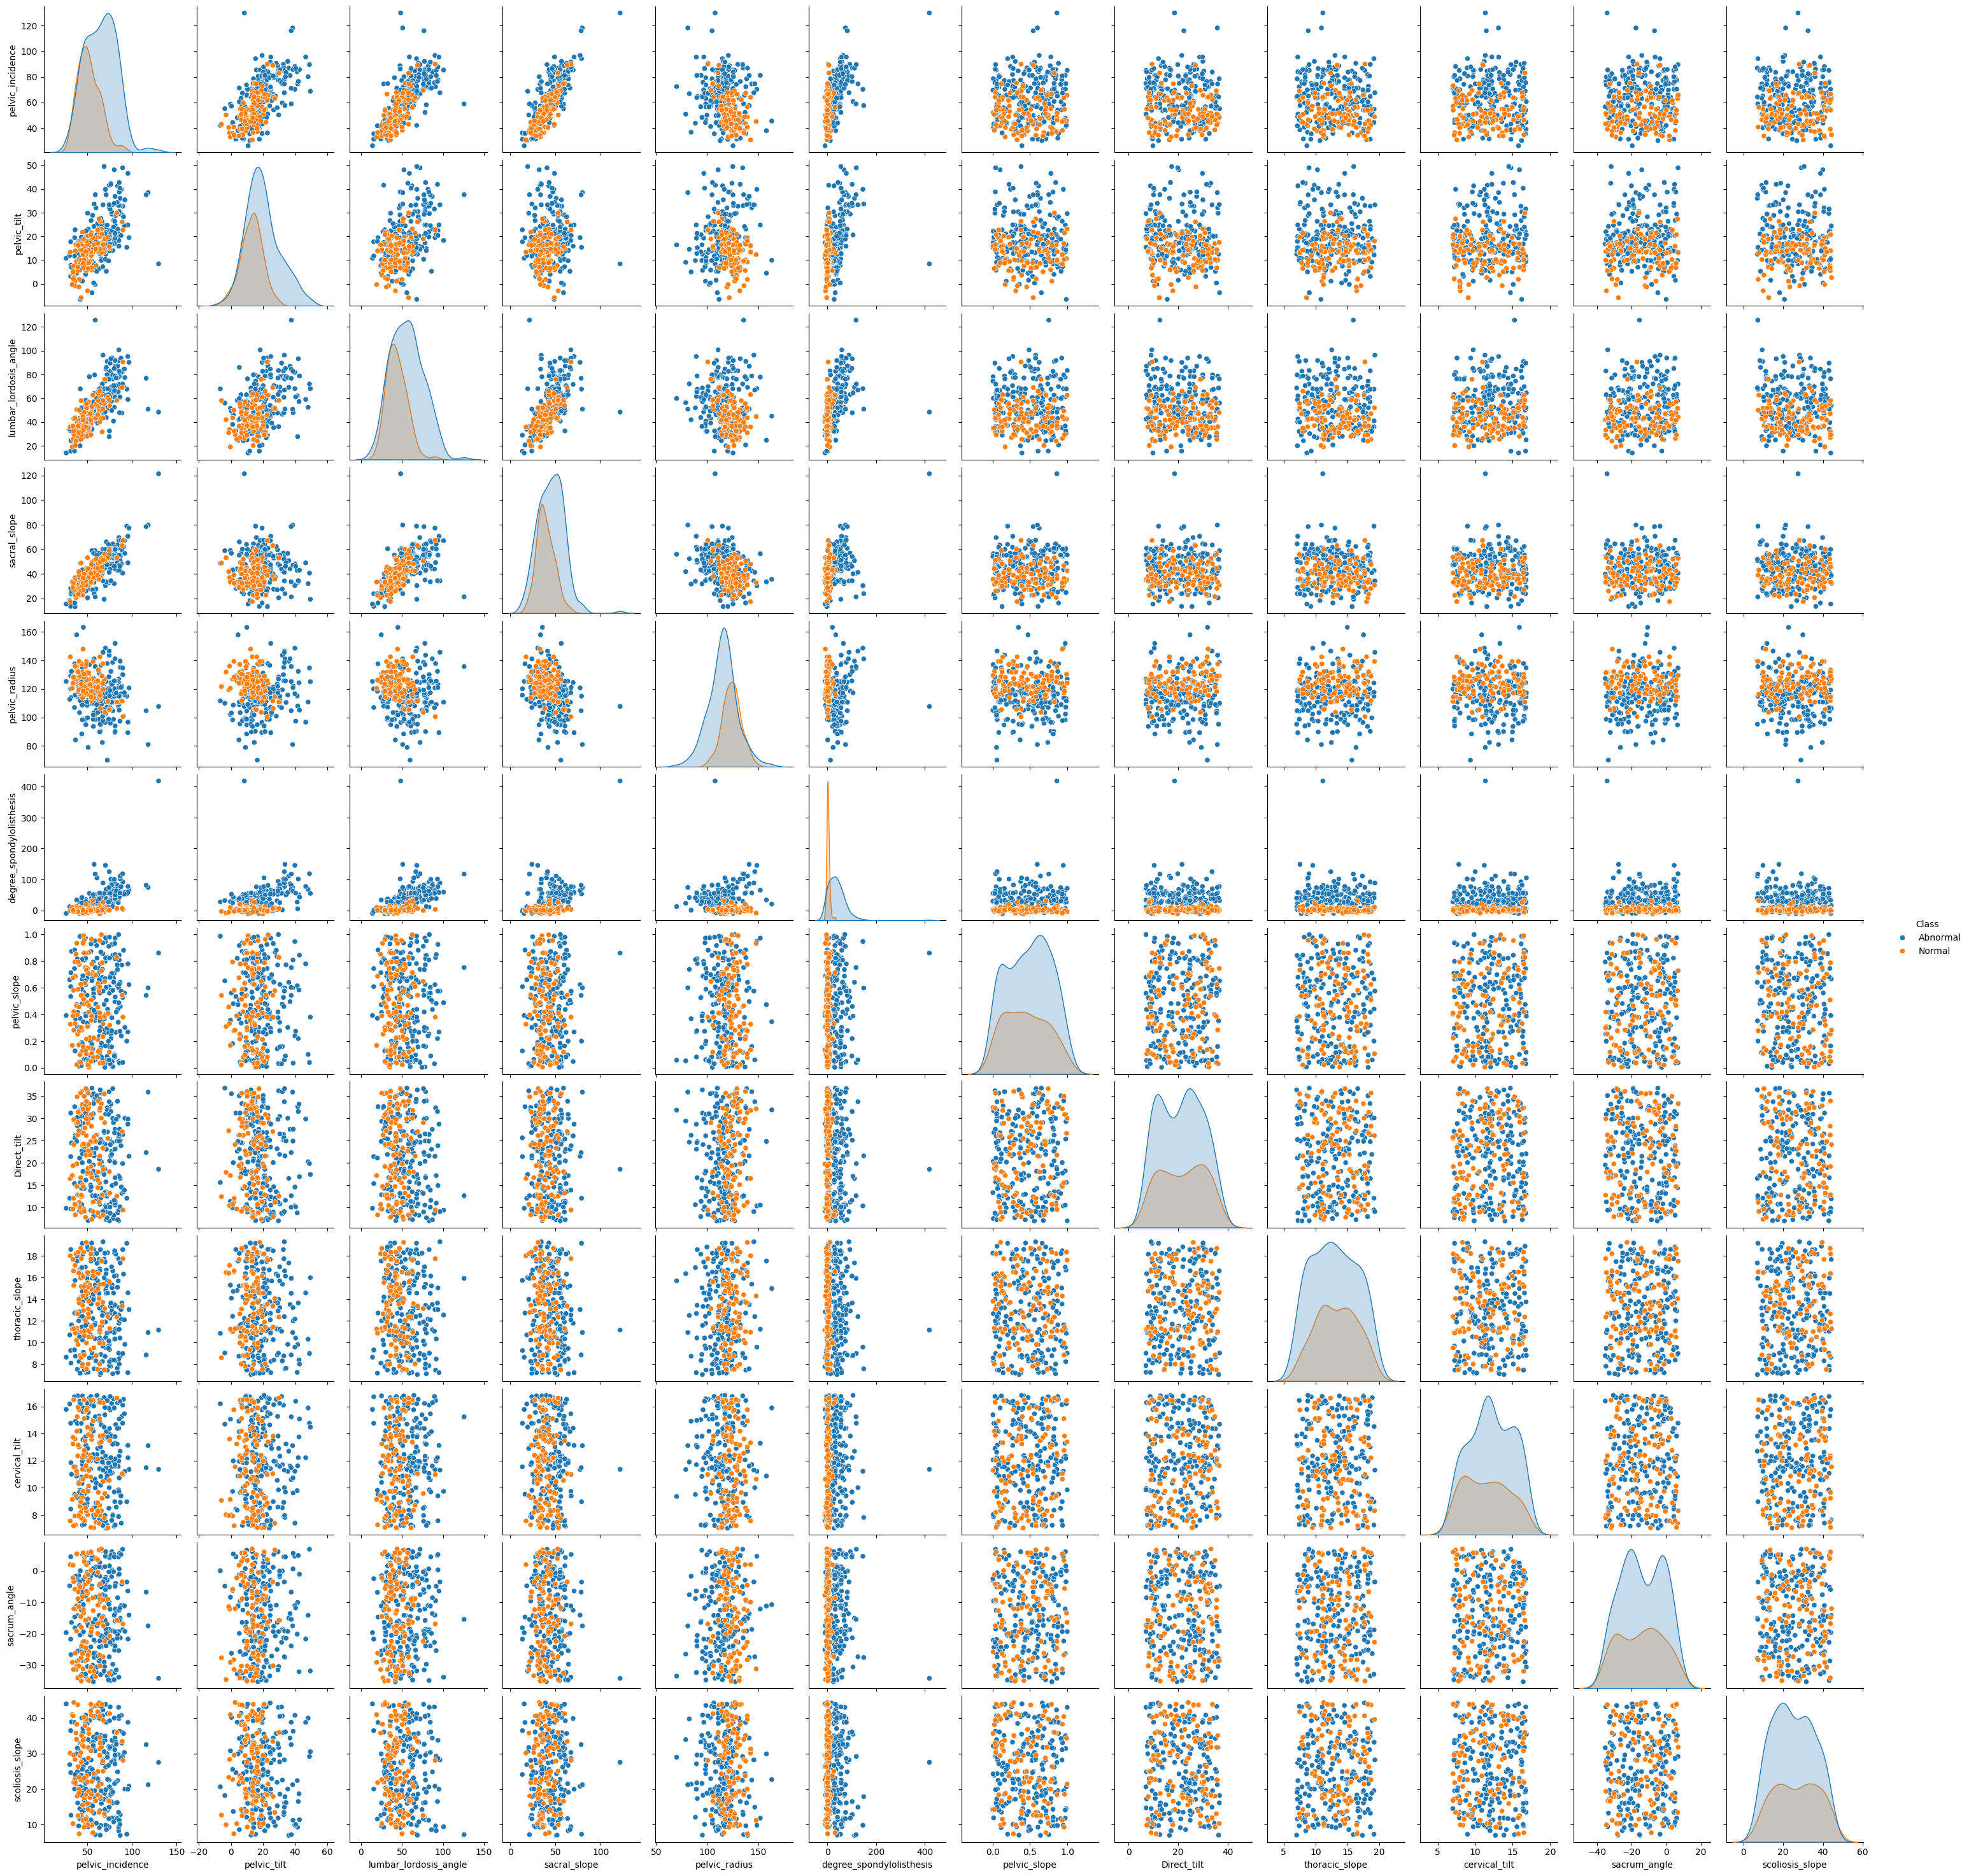

In [14]:
sns.pairplot(dataset, hue='Class')

array([[<Axes: title={'center': 'pelvic_incidence'}>,
        <Axes: title={'center': 'pelvic_tilt'}>,
        <Axes: title={'center': 'lumbar_lordosis_angle'}>],
       [<Axes: title={'center': 'sacral_slope'}>,
        <Axes: title={'center': 'pelvic_radius'}>,
        <Axes: title={'center': 'degree_spondylolisthesis'}>],
       [<Axes: title={'center': 'pelvic_slope'}>,
        <Axes: title={'center': 'Direct_tilt'}>,
        <Axes: title={'center': 'thoracic_slope'}>],
       [<Axes: title={'center': 'cervical_tilt'}>,
        <Axes: title={'center': 'sacrum_angle'}>,
        <Axes: title={'center': 'scoliosis_slope'}>]], dtype=object)

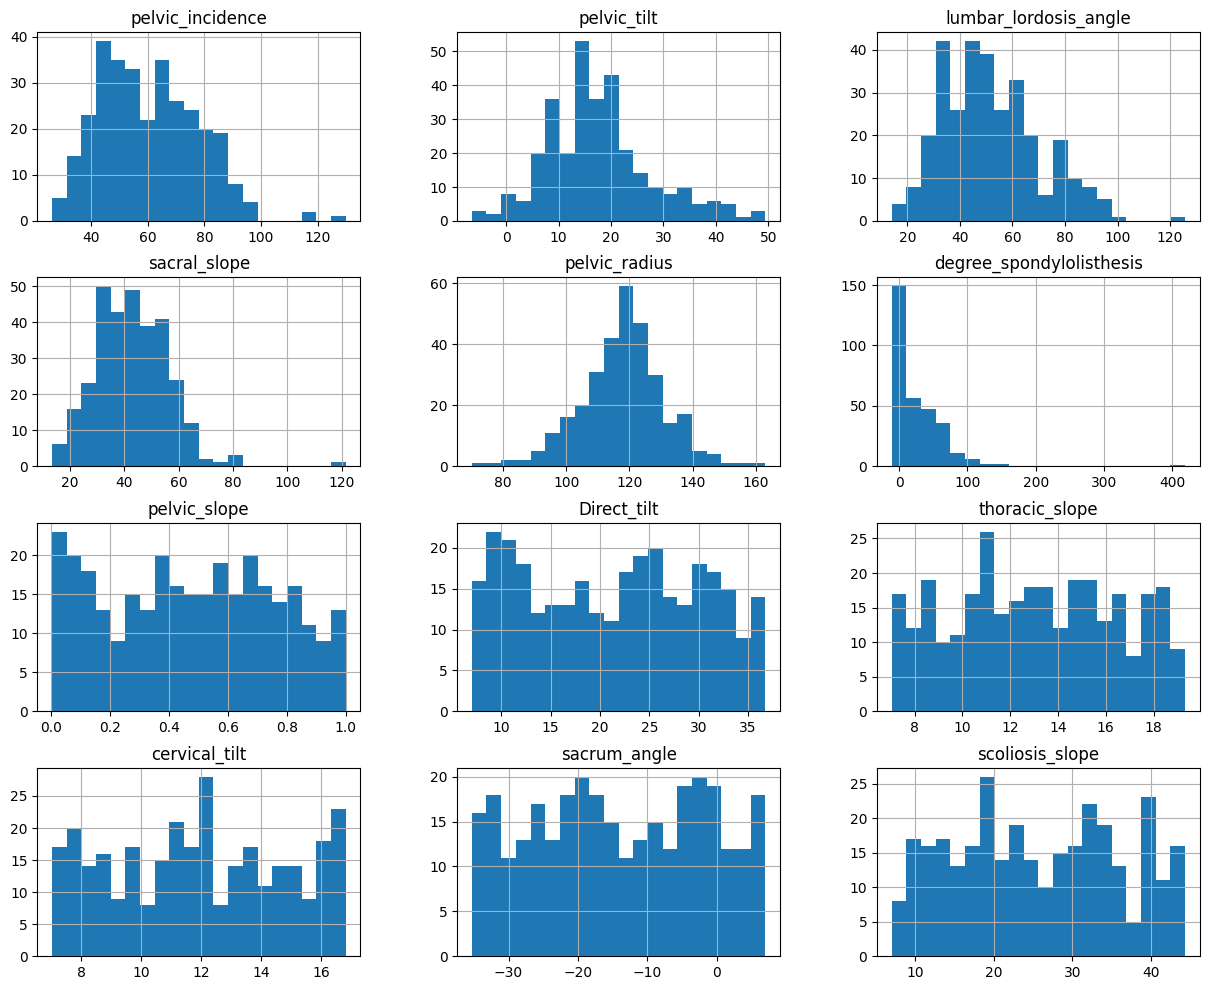

In [15]:
dataset.hist(figsize=(15,12),bins=20)

pelvic_incidence               Axes(0.125,0.712609;0.168478x0.167391)
pelvic_tilt                 Axes(0.327174,0.712609;0.168478x0.167391)
lumbar_lordosis_angle       Axes(0.529348,0.712609;0.168478x0.167391)
sacral_slope                Axes(0.731522,0.712609;0.168478x0.167391)
pelvic_radius                  Axes(0.125,0.511739;0.168478x0.167391)
degree_spondylolisthesis    Axes(0.327174,0.511739;0.168478x0.167391)
pelvic_slope                Axes(0.529348,0.511739;0.168478x0.167391)
Direct_tilt                 Axes(0.731522,0.511739;0.168478x0.167391)
thoracic_slope                  Axes(0.125,0.31087;0.168478x0.167391)
cervical_tilt                Axes(0.327174,0.31087;0.168478x0.167391)
sacrum_angle                 Axes(0.529348,0.31087;0.168478x0.167391)
scoliosis_slope              Axes(0.731522,0.31087;0.168478x0.167391)
dtype: object

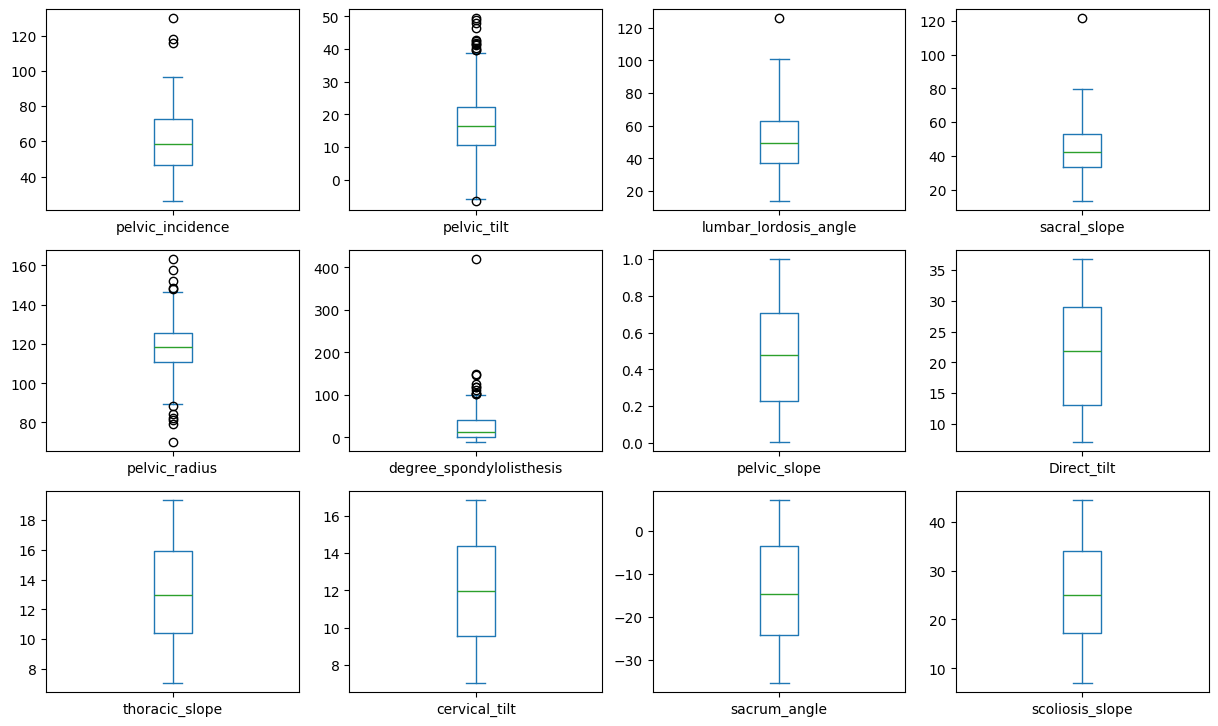

In [16]:
#create a boxplot for each feature
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,12))

In [20]:
min=0
max=0
def detect_outliers(feature):
    first_q = np.percentile(dataset[feature],25)
    third_q = np.percentile(dataset[feature],75)
    IQR = third_q - first_q
    IQR *= 1.5
    min = first_q - IQR
    max = third_q + IQR
    print(min,max)
    return dataset[(dataset[feature] < min) | (dataset[feature] > max)].index
    

In [36]:
#removing the outliers
def remove_outliers(feature):
    f_q = np.percentile(dataset[feature], 25)
    t_q = np.percentile(dataset[feature], 75)
    IQR = t_q - f_q
    IQR *= 1.5
    min = f_q - IQR
    max = t_q + IQR
    
    median = dataset[feature].median()
    dataset.loc[dataset[feature] < min, feature] = median
    dataset.loc[dataset[feature] > max, feature] = median

# Apply the remove_outliers function to each feature
for col in X.columns:
    remove_outliers(col)

In [23]:
X=dataset.iloc[:,:-1]

In [31]:
for i in range(len(X.columns)):
    outliers = detect_outliers(X.columns[i])
    if not outliers.empty:
        print(X.columns[i])

7.6058165299999985 111.13775701
-6.512919459999999 39.30038326
pelvic_tilt
-1.9999999850000023 101.99999997500001
lumbar_lordosis_angle
4.323972498750003 81.71903786875001
sacral_slope
88.57147911250001 147.6053916125
pelvic_radius
-57.921711259375 100.812789895625
degree_spondylolisthesis
-0.496351671 1.425564893
-10.795112500000002 52.803587500000006
2.2102124999999972 24.0971125
2.295135000000001 21.617815
-55.478164250000006 27.69154775
-7.996712500000001 59.16538750000001


In [38]:
remove_outliers('pelvic_incidence')
remove_outliers('pelvic_tilt')
remove_outliers('lumbar_lordosis_angle')
remove_outliers('sacral_slope')
remove_outliers('pelvic_radius')
remove_outliers('degree_spondylolisthesis')
remove_outliers('pelvic_slope')
remove_outliers('Direct_tilt')
remove_outliers('thoracic_slope')
remove_outliers('cervical_tilt')
remove_outliers('sacrum_angle')
remove_outliers('scoliosis_slope')

pelvic_incidence               Axes(0.125,0.712609;0.168478x0.167391)
pelvic_tilt                 Axes(0.327174,0.712609;0.168478x0.167391)
lumbar_lordosis_angle       Axes(0.529348,0.712609;0.168478x0.167391)
sacral_slope                Axes(0.731522,0.712609;0.168478x0.167391)
pelvic_radius                  Axes(0.125,0.511739;0.168478x0.167391)
degree_spondylolisthesis    Axes(0.327174,0.511739;0.168478x0.167391)
pelvic_slope                Axes(0.529348,0.511739;0.168478x0.167391)
Direct_tilt                 Axes(0.731522,0.511739;0.168478x0.167391)
thoracic_slope                  Axes(0.125,0.31087;0.168478x0.167391)
cervical_tilt                Axes(0.327174,0.31087;0.168478x0.167391)
sacrum_angle                 Axes(0.529348,0.31087;0.168478x0.167391)
scoliosis_slope              Axes(0.731522,0.31087;0.168478x0.167391)
dtype: object

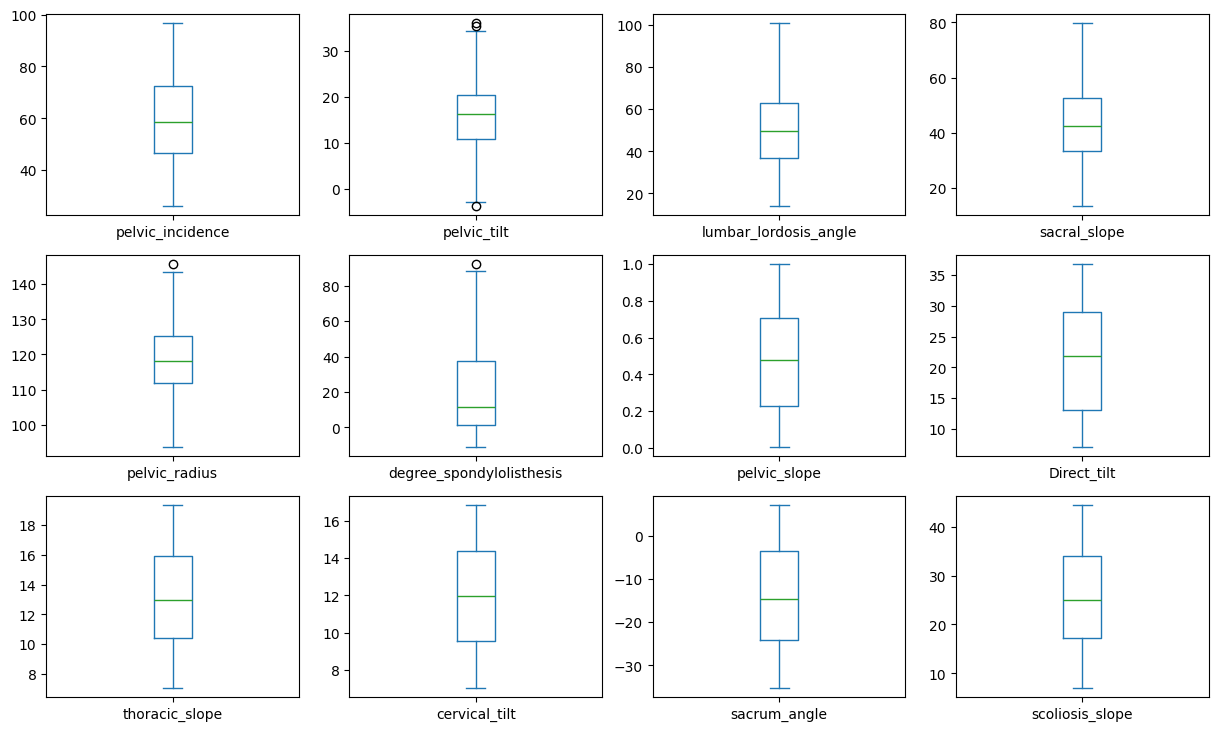

In [41]:
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,12))

In [44]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

# normalize the data
scaler = MinMaxScaler()
Scaled_data = scaler.fit_transform(dataset.drop(columns=['Class']))
scaler_df=pd.DataFrame(Scaled_data,columns=dataset.columns[:-1])
scaler_df.head()

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0          0.523049     0.661070               0.295226      0.408699   
1          0.183082     0.347234               0.126987      0.235632   
2          0.605368     0.652676               0.416076      0.501244   
3          0.611962     0.713837               0.349432      0.471552   
4          0.334210     0.336960               0.165053      0.402451   

   pelvic_radius  degree_spondylolisthesis  pelvic_slope  Direct_tilt  \
0       0.095951                  0.104804      0.744554     0.186396   
1       0.399031                  0.151548      0.413783     0.197208   
2       0.236818                  0.073025      0.473750     0.666533   
3       0.157512                  0.216031      0.367741     0.556360   
4       0.278884                  0.184087      0.542524     0.957940   

   thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope  
0        0.610506       0.845115      0.156861         0.977797  
1        0.854170       0.996300      0.230878         0.243812  
2        0.850409       0.983442      0.148026         0.327166  
3        0.461461       0.448790      0.113989         0.316741  
4        0.725757       0.188118      0.447450         0.479711

In [45]:
labels = dataset['Class']
endcoder = LabelEncoder()
labels = endcoder.fit_transform(labels)

In [46]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [48]:
X=scaler_df
y=labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [49]:
X_train

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
21           0.408052     0.623629               0.325094      0.308921   
101          0.762886     0.566139               0.568474      0.720622   
235          0.535837     0.596213               0.301773      0.461213   
45           0.351223     0.672691               0.380429      0.219067   
89           0.638764     0.694826               0.342347      0.511452   
..                ...          ...                    ...           ...   
251          0.207051     0.140579               0.415013      0.385123   
192          0.685315     0.930662               0.610324      0.419414   
117          0.849438     0.505430               0.390474      0.511452   
47           0.215639     0.510949               0.192591      0.171996   
172          0.432855     0.432584               0.343190      0.449932   

     pelvic_radius  degree_spondylolisthesis  pelvic_slope  Direct_tilt  \
21        0.607228                  0.130869      0.172783     0.540167   
101       0.406384                  0.481124      0.708781     0.143572   
235       0.373226                  0.000000      0.410881     0.428924   
45        0.457149                  0.082761      0.317379     0.794561   
89        0.504206                  0.371945      0.400782     0.070754   
..             ...                       ...           ...          ...   
251       0.877595                  0.113757      0.275159     0.140291   
192       0.473445                  0.221429      0.056409     0.897839   
117       0.547127                  0.708601      0.032131     0.690614   
47        0.377093                  0.063639      0.983351     0.748015   
172       0.000000                  0.312035      0.523862     0.032793   

     thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope  
21         0.584534       0.726355      0.924474         0.479998  
101        0.316143       0.014440      0.014995         0.567204  
235        0.334237       0.096309      0.650216         0.602711  
45         0.942545       0.871092      0.895052         0.064905  
89         0.787827       0.000000      0.724570         0.201603  
..              ...            ...           ...              ...  
251        0.772346       0.891265      0.165720         0.011371  
192        0.436343       0.304807      0.187828         0.212223  
117        0.404535       0.265247      0.967609         0.784340  
47         0.786956       0.955718      0.752329         0.201402  
172        0.906228       0.817522      0.446735         0.703811  

[248 rows x 12 columns]

In [50]:
model=LogisticRegression()

In [51]:
model.fit(X_train,y_train)

LogisticRegression()

In [52]:
model.score(X_train,y_train)

0.8467741935483871

In [53]:
model.score(X_test,y_test)

0.7741935483870968

In [54]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
model.score(X_train,y_train)

1.0

In [56]:
model.score(X_test,y_test)

0.7741935483870968